# Massey Ratings

In [1]:
import sys

sys.path.append("../../")
import penaltyblog as pb

In [2]:
fbd = pb.scrapers.FootballData("ENG Premier League", "2020-2021")
df = fbd.get_fixtures()

df.head()

,date,datetime,season,competition,div,time,team_home,team_away,fthg,ftag,...,b365_cahh,b365_caha,pcahh,pcaha,max_cahh,max_caha,avg_cahh,avg_caha,goals_home,goals_away
id,,,,,,,,,,,,,,,,,,,,,
1599868800---crystal_palace---southampton,2020-09-12,2020-09-12 15:00:00,2020-2021,ENG Premier League,E0,15:00,Crystal Palace,Southampton,1,0,...,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12,1,0
1599868800---fulham---arsenal,2020-09-12,2020-09-12 12:30:00,2020-2021,ENG Premier League,E0,12:30,Fulham,Arsenal,0,3,...,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87,0,3
1599868800---liverpool---leeds,2020-09-12,2020-09-12 17:30:00,2020-2021,ENG Premier League,E0,17:30,Liverpool,Leeds,4,3,...,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04,4,3
1599868800---west_ham---newcastle,2020-09-12,2020-09-12 20:00:00,2020-2021,ENG Premier League,E0,20:00,West Ham,Newcastle,0,2,...,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86,0,2
1599955200---tottenham---everton,2020-09-13,2020-09-13 16:30:00,2020-2021,ENG Premier League,E0,16:30,Tottenham,Everton,0,1,...,2.09,1.81,2.09,1.85,2.16,1.86,2.08,1.81,0,1


In [3]:
massey = pb.ratings.Massey(df["goals_home"], df["goals_away"], df["team_home"], df["team_away"])
massey.get_ratings()

,team,rating,offence,defence
0,Man City,1.275,1.486184,-0.211184
1,Man United,0.725,1.238962,-0.513962
2,Liverpool,0.65,1.10424,-0.45424
3,Tottenham,0.575,1.108406,-0.533406
4,Chelsea,0.55,0.832018,-0.282018
5,Leicester,0.45,1.115351,-0.665351
6,Arsenal,0.4,0.757018,-0.357018
7,West Ham,0.375,0.952851,-0.577851
8,Aston Villa,0.225,0.76674,-0.54174
9,Leeds,0.2,0.962573,-0.762573


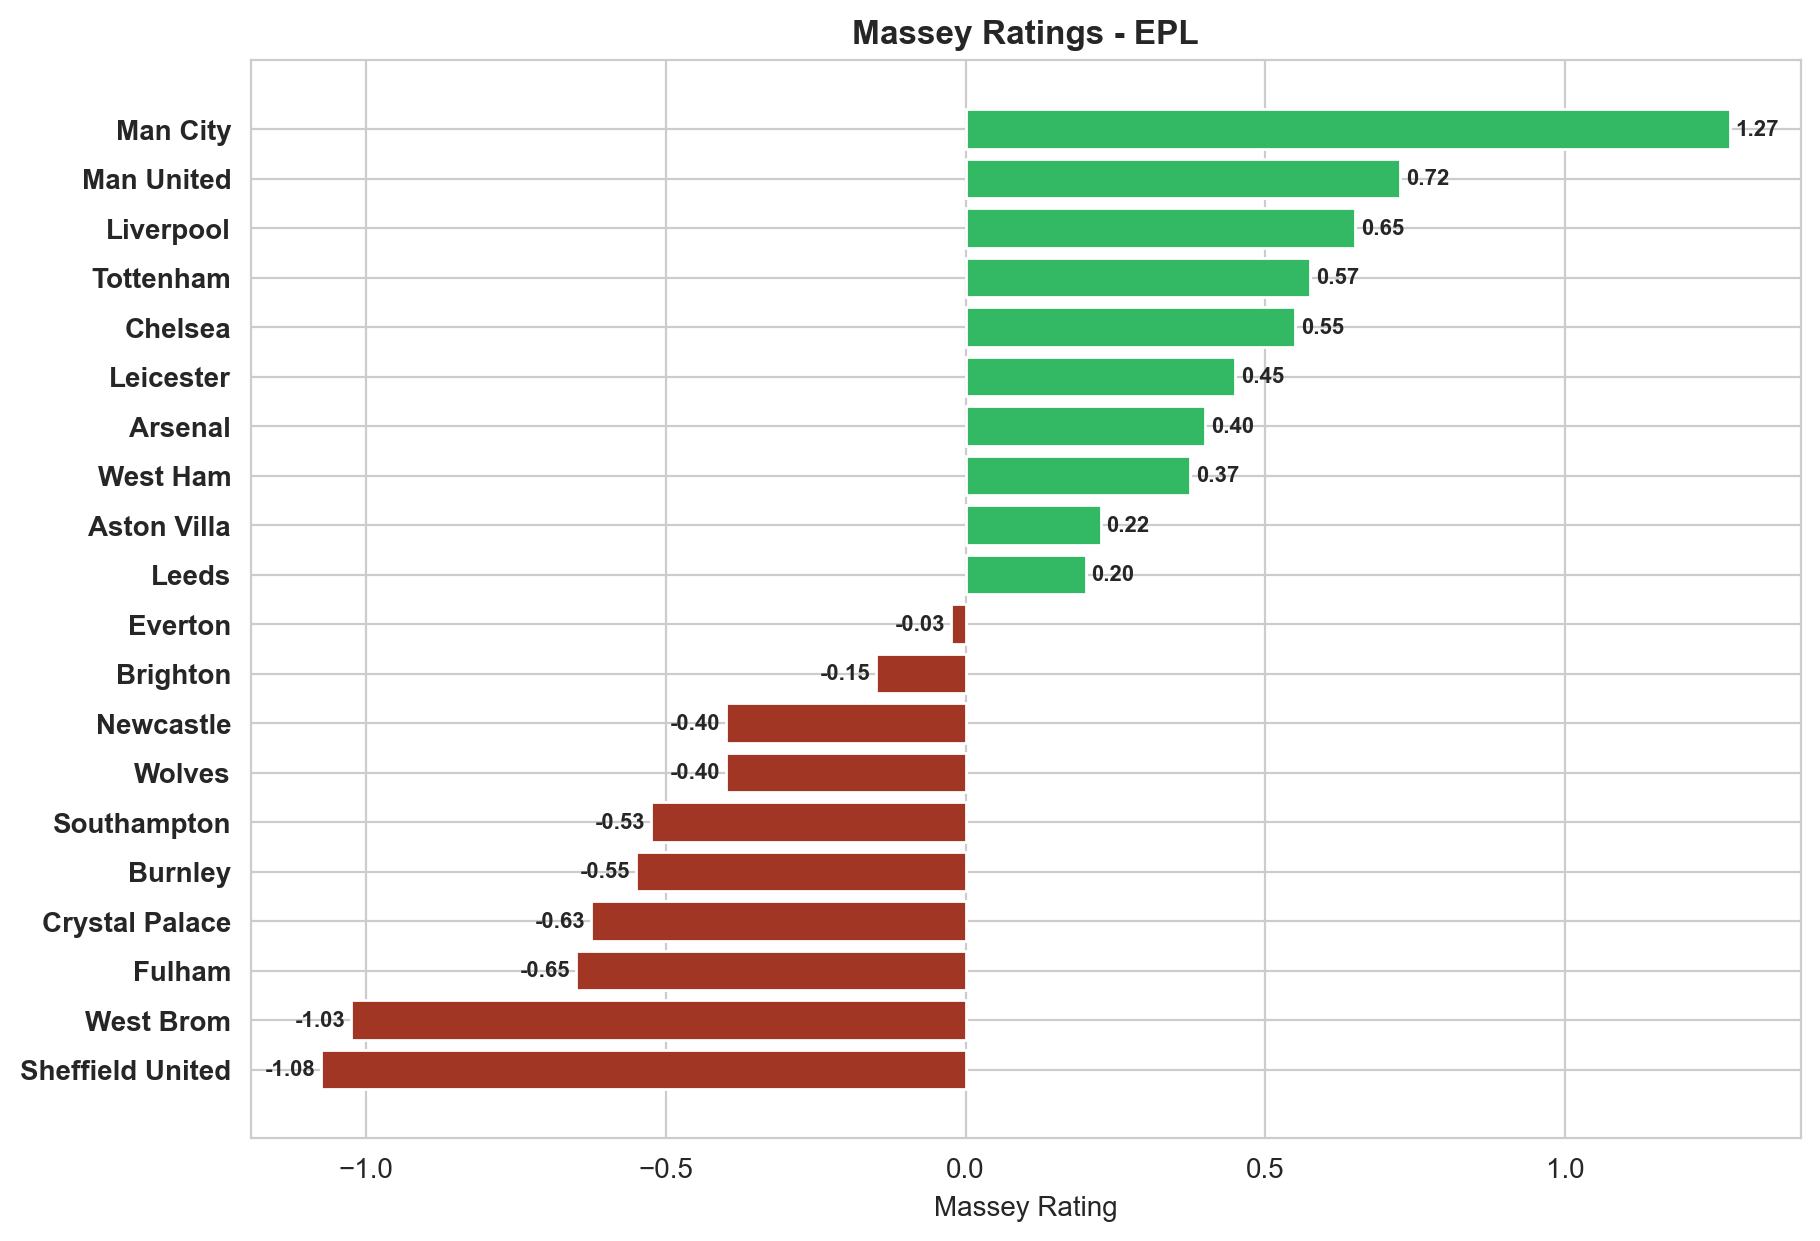

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["goals_home"], df["goals_away"], df["team_home"], df["team_away"])
ratings = massey.get_ratings()
ratings["colours"] = np.where(ratings["rating"] > 0, "#33b864", "#a03623")
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["rating"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Ratings - EPL", fontweight="bold")

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

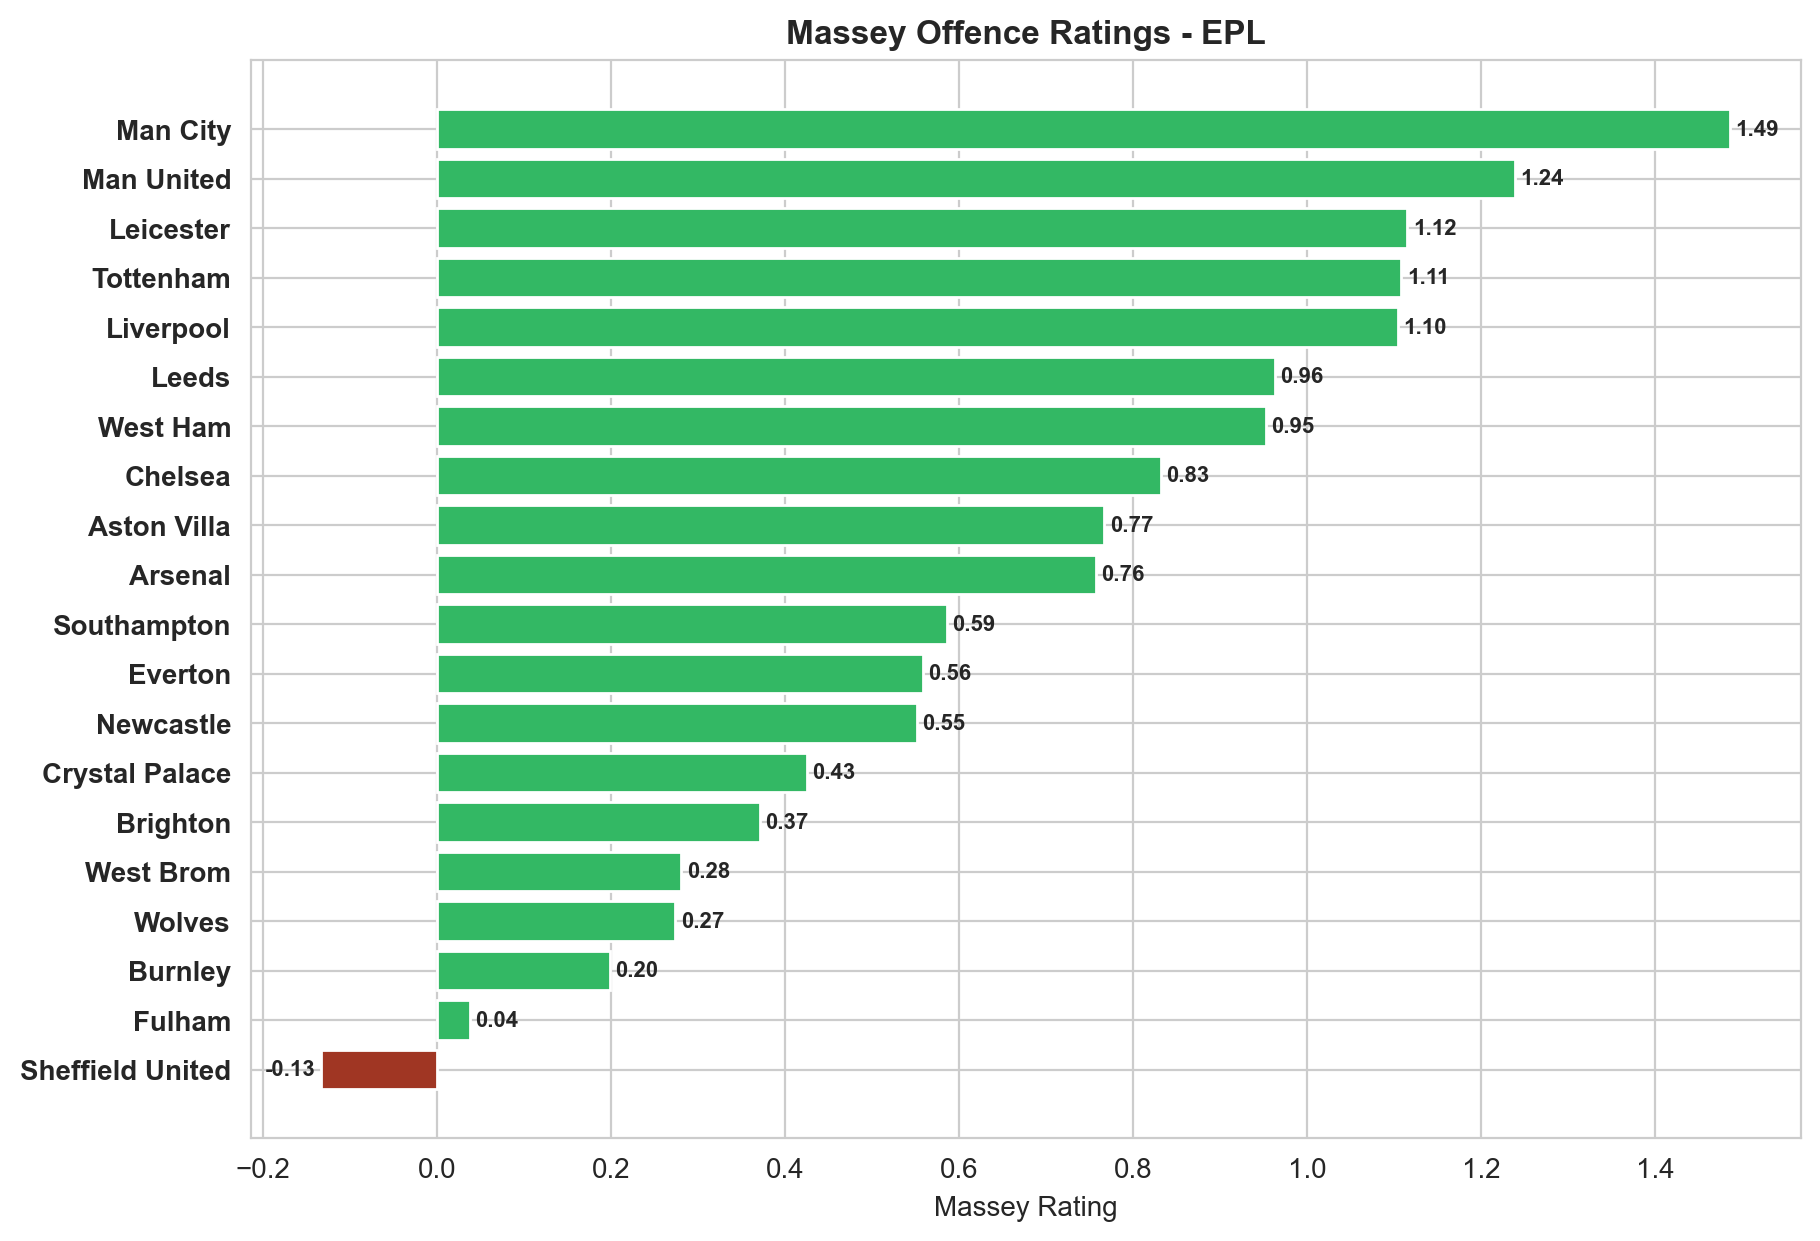

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["goals_home"], df["goals_away"], df["team_home"], df["team_away"])
ratings = massey.get_ratings()
ratings["colours"] = np.where(ratings["offence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("offence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["offence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Offence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["goals_home"], df["goals_away"], df["team_home"], df["team_away"])
ratings["colours"] = np.where(ratings["defence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("defence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["defence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Defence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

AttributeError: module 'penaltyblog' has no attribute 'massey'